In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_excel("Books.xlsx")#,encoding="latin-1")

In [7]:
df.tail()

Period  Year                       Author  \
25     Postmodern  2011           George R.R. Martin   
26     Postmodern  2007             Khaleed Hosseini   
27     Postmodern  1951                J.D. Salinger   
28  Enlightenment  1762        Jean-Jacques Rousseau   
29  Enlightenment  1781  The Critique of Pure Reason   

                                 Title              Genre  \
25                     Game of Thrones                War   
26            A thousand Splendid Suns            Fiction   
27              The Catcher in the Rye  Realistic Fiction   
28  The Social Contract and Discourses        Non-Fiction   
29                       Immanuel Kant        Non-Fiction   

                                        Location  
25                     Books/Game of Thrones.pdf  
26            Books/A thousand splendid suns.pdf  
27              Books/The Catcher in the Rye.pdf  
28  Books/The Social Contract and Discourses.pdf  
29         Books/The Critique of Pure Reason.pdf

In [9]:
#pip install PyPDF2

In [37]:
# importing required modules
import PyPDF2

for book in df['Location']:
    text=[]
    # creating a pdf file object
    pdfFileObj = open(book, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    # printing number of pages in pdf file
    print(pdfReader.numPages)
    
    for i in range(pdfReader.numPages):

        # creating a page object
        pageObj = pdfReader.getPage(i)

        # extracting text from page
        #print(pageObj.extractText())
        text.append(pageObj.extractText())
    print(text)

# closing the pdf file object
pdfFileObj.close()


224
["11/11/22, 2:39 PM\nPage 1 of 224https://www.gutenberg.org/files/47960/47960-0.txtThe Project Gutenberg EBook of Shakespeare's Tragedy of Romeo and Juliet, by William ShakespeareThis eBook is for the use of anyone anywhere in the United States and mostother parts of the world at no cost and with almost no restrictionswhatsoever.  You may copy it, give it away or re-use it under the terms ofthe Project Gutenberg License included with this eBook or online atwww.gutenberg.org.  If you are not located in the United States, you'll haveto check the laws of the country where you are located before using this ebook.Title: Shakespeare's Tragedy of Romeo and JulietAuthor: William ShakespeareEditor: William J. RolfeRelease Date: January 13, 2015 [EBook #47960]Language: EnglishCharacter set encoding: UTF-8*** START OF THIS PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***Produced by Fritz Ohrenschall, Sania Ali Mirza, Jane Robinsand the Online Distributed Proofreading Team athttp://www.pgdp.net (T

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



['11/11/22, 3:38 PM\nPage 1 of 159https://www.gutenberg.org/cache/epub/105/pg105.txtThe Project Gutenberg eBook of Persuasion, by Jane AustenThis eBook is for the use of anyone anywhere in the United States andmost other parts of the world at no cost and with almost no restrictionswhatsoever. You may copy it, give it away or re-use it under the termsof the Project Gutenberg License included with this eBook or online atwww.gutenberg.org. If you are not located in the United States, youwill have to check the laws of the country where you are located beforeusing this eBook.Title: PersuasionAuthor: Jane AustenRelease Date: February, 1994 [eBook #105][Most recently updated: August 31, 2022]Language: EnglishProduced by: Sharon Partridge and Martin Ward*** START OF THE PROJECT GUTENBERG EBOOK PERSUASION ***Persuasionby Jane Austen(1818)Contents CHAPTER I. CHAPTER II. CHAPTER III. CHAPTER IV. CHAPTER V. CHAPTER VI. CHAPTER VII. CHAPTER VIII. CHAPTER IX. CHAPTER X. CHAPTER XI. CHAPTER XII. CHAP

KeyboardInterrupt: 

### Knowledge Graph

In [14]:
df1=df.sort_values(by="Year")

In [15]:
df1.head()

Period  Year               Author                            Title  \
7  Enlightenment  1596  William Shakespeare         A midsummer nights dream   
0  Enlightenment  1597  William Shakespeare                 Romeo and Juliet   
5  Enlightenment  1598  William Shakespeare                   As you like it   
6  Enlightenment  1599  William Shakespeare                    Julius Caesar   
1  Enlightenment  1669  Marianna Alcoforado  The Letters of a Portuguese Nun   

     Genre                                   Location  
7   Comedy         Books/A midsummer nights dream.pdf  
0  Romance                 Books/Romeo and Juliet.pdf  
5   Comedy                   Books/As you like it.pdf  
6  Tragedy                    Books/Julius Caesar.pdf  
1  Romance  Books/The Letters of a Portuguese Nun.pdf

In [16]:
df1.tail()

Period  Year              Author                     Title  \
22      Modern  1923    Booth Parkington          Bimbo the pirate   
27  Postmodern  1951       J.D. Salinger    The Catcher in the Rye   
24  Postmodern  2007        J.K. Rowling              Harry Potter   
26  Postmodern  2007    Khaleed Hosseini  A thousand Splendid Suns   
25  Postmodern  2011  George R.R. Martin           Game of Thrones   

                Genre                            Location  
22             Comedy          Books/Bimbo the pirate.pdf  
27  Realistic Fiction    Books/The Catcher in the Rye.pdf  
24              Magic              Books/Harry Potter.pdf  
26            Fiction  Books/A thousand splendid suns.pdf  
25                War           Books/Game of Thrones.pdf

In [23]:
#pip install wordcloud

224
126
798
86
175
73
72
71
272
159
77
86
297
78
232
389
89
156
78
78
25
162
41
33
3705
3146
70
115
230
385


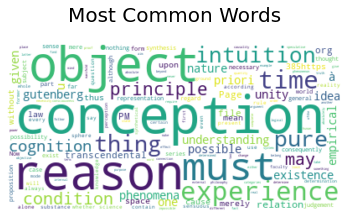

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for book in df['Location']:
    texts=[]

    # creating a pdf file object
    pdfFileObj = open(book, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    # printing number of pages in pdf file
    print(pdfReader.numPages)
    
    for i in range(1,pdfReader.numPages):

        # creating a page object
        pageObj = pdfReader.getPage(i)

        # extracting text from page
        texts.append(pageObj.extractText())

    ext_text = " ".join(text for text in texts)

    text_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(ext_text)

    plt.imshow(text_cloud, interpolation='bilinear')
    plt.title('Most Common Words', fontsize=20, y=1.1)
    plt.axis("off");

# closing the pdf file object
pdfFileObj.close()

In [30]:
import re

import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
pattern = [[{'POS':'NOUN'}, 
           {'LOWER': 'such'}, 
           {'LOWER': 'as'}, 
           {'POS': 'PROPN'}]]
Matcher.add("matching_1", patterns=pattern)


TypeError: descriptor 'add' for 'spacy.matcher.matcher.Matcher' objects doesn't apply to a 'str' object

In [31]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5  
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]

In [ ]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
    entity_pairs.append(get_entities(i))

### Relation Prediction Extraction

In [32]:
def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [33]:
get_relation("John completed the task")

TypeError: add() takes exactly 2 positional arguments (3 given)

In [ ]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

### Building the knowledge graph

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()


In [40]:
# importing required modules
import PyPDF2

for book in df['Location']:
    text=[]
    # creating a pdf file object
    pdfFileObj = open(book, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    # printing number of pages in pdf file
    print(pdfReader.numPages)
    
    for i in range(pdfReader.numPages):

        # creating a page object
        pageObj = pdfReader.getPage(i)

        # extracting text from page
        #print(pageObj.extractText())
        text.append(pageObj.extractText())
    entity_pairs = []

    for j in tqdm(text):
        entity_pairs.append(get_entities(j))
    relations = [get_relation(k) for k in tqdm(text)]
    
    # extract subject
    source = [i[0] for i in entity_pairs]

    # extract object
    target = [i[1] for i in entity_pairs]

    kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
    
    # create a directed-graph from a dataframe
    G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
    
    G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

    plt.figure(figsize=(12,12))
    pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
    nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
    plt.show()

# closing the pdf file object
pdfFileObj.close()

224


  0%|                                                   | 0/224 [00:00<?, ?it/s]

TypeError: add() takes exactly 2 positional arguments (3 given)